<a href="https://colab.research.google.com/github/idowu-james/Investigate-A-Dataset---Medical-Appointment-No-Shows/blob/main/Copy_of_Project_1_Udacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project: Investigate a Dataset - Medical Appointment No Shows**

<a id='intro'></a>
## **Introduction**

### Dataset Description 


> This dataset contains information from 100k plus medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

**The variables represented in this dataset are:**


> **01 - PatientId** : Identification of a patient , 
**02 - AppointmentID** : Identification of each appointment , **03 - Gender** :
Male or Female , **04 - AppointmentDay** : The day of the actual appointment , **05 - ScheduledDay** : The day someone called or registered the appointment , **06 - Age** : Patient's Age , **07 - Neighbourhood** : Were the appointments is taking place , **08 - Scholarship** : True of False(Bolsa Família Scholarship), **09 - Hipertension** : True of False , **10 - Diabetes** : True of False , **11 - Alcoholism** : True of False , **12 - Handcap** : True of False , **13 - SMS_received** : 1 or more messages sent to the patient , **14 - No-show** : True of False





## **Questions for Analysis**


*1) How much does age play in whether a person will show up for their appointment**


> ***Rational:*** Younger people tend to prioritize other things over their health. I will try to findout if younger people who are above the age of parental guidance have a higher percentage of missing appointments than other age groups

*2) How much does the time difference between the date appointment was made and the actual date of the appointment play in whether a person will show up for their appointment**


> ***Rational:*** According to the behavioural sciences, the time intervel between intention and behaviour plays a significant role in behaviour. I intend to find out whether the longer between the day the appointment was made and the actual appointment date makes any significant difference in the patient's showing up. 
I will also investigate if this time interval of no show is affected by the patient's age.





In [180]:
# Imports of all nessecary packages 
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline



In [181]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0
pd.__version__

'1.3.5'

###Data Wrangling:

> Loading in the dataset, check for cleanliness, get familiar with the dataset for analysis.

In [182]:
# Loading in the dataset

df = pd.read_csv('https://raw.githubusercontent.com/idowu-james/Investigate-A-Dataset---Medical-Appointment-No-Shows/main/KaggleV2-May-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [183]:
# Getting the nos of rows and columns in the dataset

df.shape

(110527, 14)

In [184]:
# Understanding the general idea of the dataset, the datatypes of each variable and seeing if there are any missing values in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [185]:
# Checking if there are any duplicate entries
df.duplicated().value_counts()

# todo print out total values of True if available or print out 0 duplicates if none

False    110527
dtype: int64

In [186]:
df[df.duplicated()].shape

(0, 14)

In [187]:
# Getting the statistical Overview of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


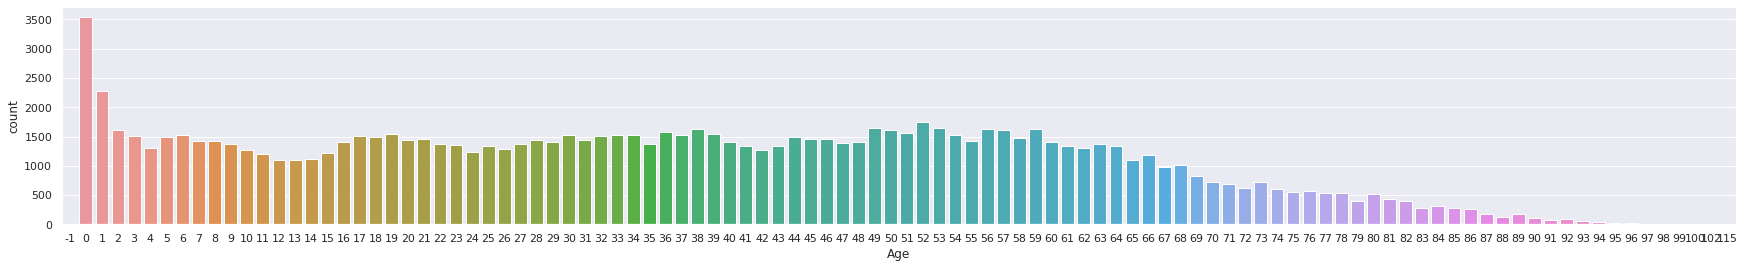

In [188]:
# Getting a quick snapshot of the age distribution of the dataset

#df['Age'].value_counts().sort_values().plot(kind='bar', figsize = (25,5))
sns.set(rc={'figure.figsize':(30,4)})
sns.countplot(x="Age",data=df );



> It appears the ages from 2 to 68 have a fairly uniform representation in the data set. <br> This is going to be good for our analysis going forward





In [189]:
#Confirming the number of unique values for each columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Handicap has 5 unique values which is unusal as per the original variable ranges given by the data collectors. The record is meant to only have 0 & 1. Investigating further

In [190]:
# Checking the value ranges for handicap
df.Handcap.unique()

array([0, 1, 2, 3, 4])

In [191]:
# Checking a sample of the unusual entry to verify if these are wrong entries or mistakes
df[df['Handcap'] == 4]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
91820,9.251878e+12,5789549,M,2016-06-08T15:14:00Z,2016-06-08T00:00:00Z,15,DA PENHA,0,0,0,0,4,0,No
98538,4.972463e+14,5760621,M,2016-06-01T15:11:25Z,2016-06-03T00:00:00Z,19,SÃO PEDRO,0,0,0,0,4,0,No
104268,7.581895e+14,5697136,F,2016-05-13T15:01:17Z,2016-06-02T00:00:00Z,9,ITARARÉ,0,0,0,0,4,1,Yes


Upon Further investigation, It appears the dataset has been updated to include a non-binary handicap scale. 

The current scale of 0-4 describes if a patient has between 0 to 4 total number of disabilities. 0 - being no disability by brazilian law, 1 - being one type of disability(e.g blindness) and 4 - being four total disability count according to brazilian law( eg blindness, deafness, lameness and dumbness)

No further information is given by dataset creators.


### Data Cleaning
> There are no missing or duplicated values in the dataset, but there seems to be some unsual values in the data. E.g Age in the negatives or  ages above 100. This might not be errors because it's possible an age of -1 signifying a baby still in the womb and ages above 100, though uncommon are still possible. Further investigations will determine if these values will be useful .

 

In [192]:
# Checking for entries with ages in the negatives
df[df['Age'] < 0]  

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There's only one entry for ages < 0, so it's safe to drop it as it won't affect our analysis in any meaningful way

In [193]:
# dropping entry for patient < 0
df = df.drop(99832)

In [194]:
# Checking
df[df['Age'] < 0]  

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [195]:
#Checking to make sure data is still intact

df.shape

(110526, 14)

Checking for entries above 98 years(I'am using this as an outlier age group)

In [196]:
df[df['Age'] > 98] 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
79270,9.739430e+12,5747809,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9.739430e+12,5747808,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,5.578313e+13,5670914,F,2016-05-06T14:55:36Z,2016-06-03T00:00:00Z,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
97647,3.661577e+10,5775674,F,2016-06-06T09:46:34Z,2016-06-06T00:00:00Z,99,SANTO ANTÔNIO,0,1,1,0,0,0,No


There's a significang number of people within this range, so we can keep the records for now

Since there are no wrong entries or duplicates in the data, i am just going to perform a bit of housekeeping, which will include



1.   Renaming the columns from Camelcases to underscore seperated cases for better readability and preference
2.   Change the ScheduledDay & AppointmentDay columns from string to Datetime
3.   Group the Ages into age-groups for our analysis
4.   Convert the No-show columns from yes/no to 0/1 to conform with other records and analysis
5.    Make a column to show the difference the time interval between the ScheduledDay & AppointmentDay of each entry.




In [197]:
# 1. Renaming the columns from CamelCases to underscore seperated cases
def snake_case(cols):  
    return ''.join(['_'+i.lower() if i.isupper()
               else i for i in cols]).lstrip('_')

df.columns = df.columns.map(snake_case)

In [198]:
df.columns

Index(['patient_id', 'appointment_i_d', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 's_m_s_received',
       'no-show'],
      dtype='object')

In [199]:
# fixing columns appointment_i_d and s_m_s_received

df = df.rename(columns={'appointment_i_d': 'appointment_id' , 's_m_s_received': 'sms_received'})
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no-show'],
      dtype='object')

In [200]:
# 2.Change the ScheduledDay & AppointmentDay columns from string to Datetime

df['sd']  = df['scheduled_day'].astype('datetime64')

df['sd'].head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: sd, dtype: datetime64[ns]

In [201]:
df['ad']  = df['appointment_day'].astype('datetime64')
df['ad']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: ad, Length: 110526, dtype: datetime64[ns]

In [202]:
# 3. Grouping the Ages into age-groups for analysis

bin = [0,18,25,39,60,80,120]

df['age_group'] = pd.cut(x=df['age'], bins= bin, 
                         labels=['Pre-teen/Teen(0-18)', 'Young Adult(', 'Adult',
                                 'Middle Aged', 'Senior Citizen','Elderly'],
                         right=True)
df['age_group'].value_counts(normalize=True) * 100



Middle Aged            29.426940
Pre-teen/Teen(0-18)    23.672970
Adult                  19.331321
Senior Citizen         15.805659
Young Adult(            9.097367
Elderly                 2.665744
Name: age_group, dtype: float64

In [203]:
# 4.Convert the No-show columns from yes/no to 0/1 to conform with other records
# Creating a column for 1 if patient shows up and 0 if they don't

df['show_up'] = df['no-show'].map(dict(Yes=0, No=1))

In [204]:
#checking to see if the values match
df['no-show'].value_counts()

No     88207
Yes    22319
Name: no-show, dtype: int64

In [205]:
df['show_up'].value_counts()

1    88207
0    22319
Name: show_up, dtype: int64

In [206]:
# 5. Make a column to show the difference the time interval between the ScheduledDay & AppointmentDay of each entry

df['time_interval'] = (df.ad - df.sd)

In [207]:
df[df.time_interval < "-5 days"]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,sd,ad,age_group,show_up,time_interval
71533,9.982316e+14,5686628,F,2016-05-11T13:49:20Z,2016-05-05T00:00:00Z,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-11 13:49:20,2016-05-05,Elderly,0,-7 days +10:10:40


In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])